In [1]:
#import required libraries
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from textblob import TextBlob
#is a Python (2 and 3) library for processing textual data

#To detect language
from langdetect import detect

#To perform sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

#For cloud picture
import os
from PIL import Image

#NLP
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer

from nltk.corpus import stopwords
from stop_words import get_stop_words
import re
from nltk.tokenize import sent_tokenize
#WordCloud
from wordcloud import WordCloud,STOPWORDS

#Machine learning
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report



- tokenize: for splitting.
- sent_tokenize: Splits a paragraph into sentences and turns them into an array. If you give a book, it divides it into sentences. (sentences tokenize)
- word_tokenize: Separates all the words in a sentence and turns them into a list.

In [2]:
nltk.download('punkt')#Since nltk has too many packages, we will only download the ones we need

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\fa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
print(nltk.corpus.stopwords.words('english')) #this line prints unnecessary words in english

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
df = pd.read_csv("restaurant.csv") #df = pd.read_csv("restaurant.csv",index_col=0)

In [9]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17
...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51


## Exploratory Data Analysis with Data Visualization

In [10]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [11]:
df.sample(10)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
8722,3064910,KWNUkYatppDhyMrb4ub7Uw,AXhYA5zVIMdeJmQLKG1PQA,RESDUcs7fIiihp38-d6_6g,2,0,0,0,This buffet advertises as the best buffet in L...,2019-09-19 15:58:38
9232,3113302,-_zUV4yH5aAcTr0utJiymQ,W4ld-oeA9nAoIyI5yZU7SQ,RESDUcs7fIiihp38-d6_6g,2,0,0,0,I've been here maybe about 3-4 times and this ...,2019-08-14 22:47:41
3238,2613207,ZmBIfOOfHw178UEREN2z0g,Ls2Occ5eH2NYvgzzZmHoCg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,This place was awesome and definitely worth th...,2016-06-04 15:24:06
7193,2924784,64TEFmq2fBT8hV3kVFXpxw,tx_PcXtzSBA0DFngdcQG3Q,RESDUcs7fIiihp38-d6_6g,5,0,0,1,Best buffet in Vegas - hands down. The food i...,2013-03-13 22:34:01
9225,3112570,fwUcxoaklwQwfx6tQl36cg,dAmnlmn3u-WKbkHctSYmoQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"The food is absolutely amazing, great selectio...",2019-09-11 03:50:34
7620,2959899,yBIYwRg18FurWM7YF_1Yng,4BM2CDEKsuRjlvOwSIBKvA,RESDUcs7fIiihp38-d6_6g,3,0,0,0,"Great buffet, but long wait time. No salad bar...",2017-12-02 05:55:44
1985,2519323,l3s2M-XRZBf22CBsrZZw9w,-Uns5qHT6m5SMiEF7rYLIw,RESDUcs7fIiihp38-d6_6g,3,0,0,0,Nothing special...way too expensive for the pr...,2016-02-27 02:08:44
5159,2759659,OCQd6vbCDKj_Akhl-K26_w,eQLDr5TNgVi4z7yseFVBfQ,RESDUcs7fIiihp38-d6_6g,4,0,0,0,We love this buffet. This is my all time favor...,2017-09-05 19:32:27
6524,2866673,1hTaqlPYdrajxGvOYUguCQ,GWOf1oB2mTalRY_A-EjSiQ,RESDUcs7fIiihp38-d6_6g,5,1,0,2,(4.5 stars) The buffet at Caesars Palace is pr...,2016-01-01 20:23:05
8904,3083096,_Zs0xBIBQAPTTF1WTtx-yw,CmOo0--p5gjQPbFt2AFt7g,RESDUcs7fIiihp38-d6_6g,1,0,1,0,Too expensive for mediocre food with so so ser...,2019-10-04 23:28:41


In [12]:
df.tail()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51
10416,3220316,mMa_YQNBJfuh_Nw_x81jlw,GsALS1y9wJoBRJTEzJiISg,RESDUcs7fIiihp38-d6_6g,4,1,1,1,I got a chance to go to the Bacchanal Buffett ...,2019-11-30 22:36:56


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [14]:
df.isnull().sum()#Detect missing values

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [15]:
df.stars.value_counts()# How many customers embarking from which port?

5    4247
4    2636
3    1561
1    1056
2     917
Name: stars, dtype: int64

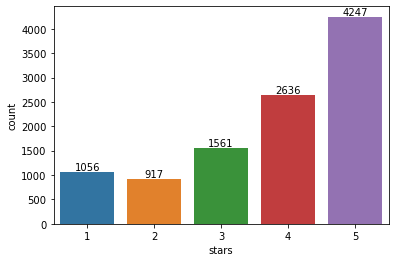

In [16]:
ax = sns.countplot(data=df,x='stars');# Show distribution of the count of stars 
ax.bar_label(ax.containers[0]);

In [17]:
df['date']=pd.to_datetime(df['date'])

In [18]:
df['day'] = (df['date']).dt.day #Creates a new column named day and pulls the day from the date column
df['month'] = (df['date']).dt.month
df['year'] = (df['date']).dt.year

In [19]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,day,month,year
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,4,12,2012
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,17,1,2014
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,8,6,2015
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,19,12,2016
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,28,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36,17,11,2019
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07,12,11,2019
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22,12,12,2019
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51,1,11,2019


In [20]:
df.year.value_counts(normalize=True)

2019    0.161755
2017    0.152443
2015    0.136220
2018    0.135068
2016    0.131708
2014    0.126620
2013    0.115196
2012    0.040991
Name: year, dtype: float64

In [21]:
df.month.value_counts(normalize=True)

12    0.095517
11    0.092253
9     0.092157
7     0.090717
10    0.088893
8     0.087165
6     0.084669
1     0.081981
4     0.077854
3     0.074878
2     0.068446
5     0.065470
Name: month, dtype: float64

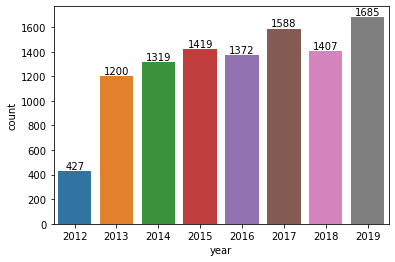

In [22]:
ax=sns.countplot(data=df,x='year');
ax.bar_label(ax.containers[0]);

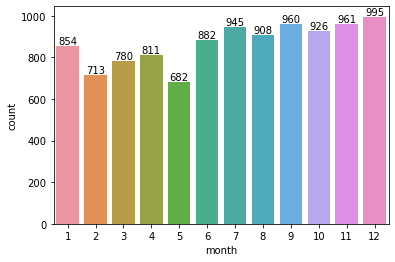

In [23]:
ax=sns.countplot(data=df,x='month');
ax.bar_label(ax.containers[0]);

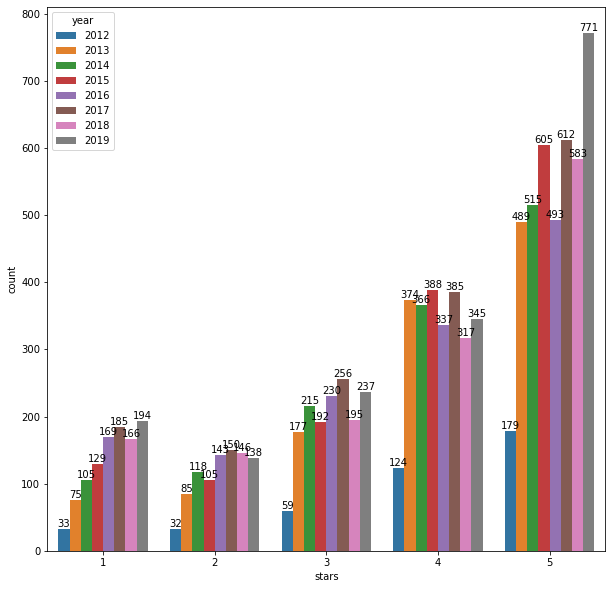

In [24]:
plt.figure(figsize=(10,10))
ax=sns.countplot(data=df,hue="year",x="stars");
for container in ax.containers:
    ax.bar_label(container)

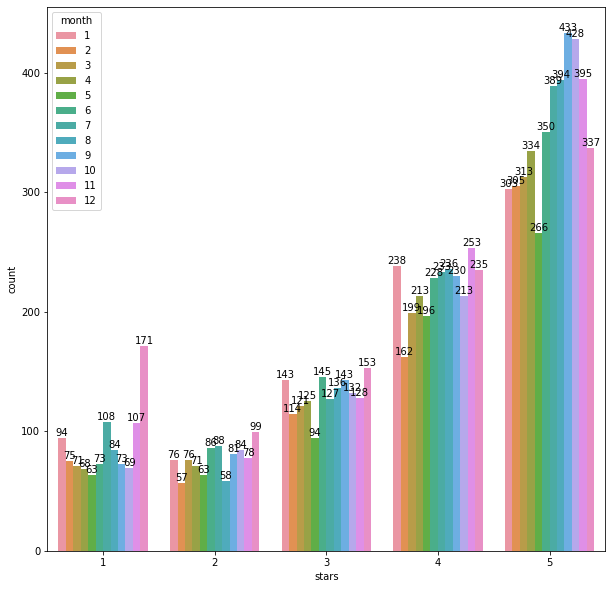

In [25]:
plt.figure(figsize=(10,10))
ax=sns.countplot(data=df,hue="month",x="stars");
for container in ax.containers:
    ax.bar_label(container)

<AxesSubplot:>

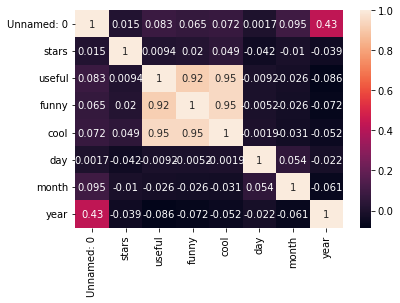

In [26]:
 sns.heatmap(df.corr(), annot=True)

In [27]:
df.corr()

,Unnamed: 0,stars,useful,funny,cool,day,month,year
Unnamed: 0,1.000000,0.014974,0.082662,0.064830,0.071627,0.001749,0.095198,0.425527
stars,0.014974,1.000000,0.009373,0.019756,0.049066,-0.042385,-0.010489,-0.039075
useful,0.082662,0.009373,1.000000,0.917116,0.947522,-0.009152,-0.025523,-0.085680
funny,0.064830,0.019756,0.917116,1.000000,0.946281,-0.005208,-0.026434,-0.072232
cool,0.071627,0.049066,0.947522,0.946281,1.000000,-0.001946,-0.030844,-0.052371
day,0.001749,-0.042385,-0.009152,-0.005208,-0.001946,1.000000,0.053804,-0.021964
month,0.095198,-0.010489,-0.025523,-0.026434,-0.030844,0.053804,1.000000,-0.061079
year,0.425527,-0.039075,-0.085680,-0.072232,-0.052371,-0.021964,-0.061079,1.000000


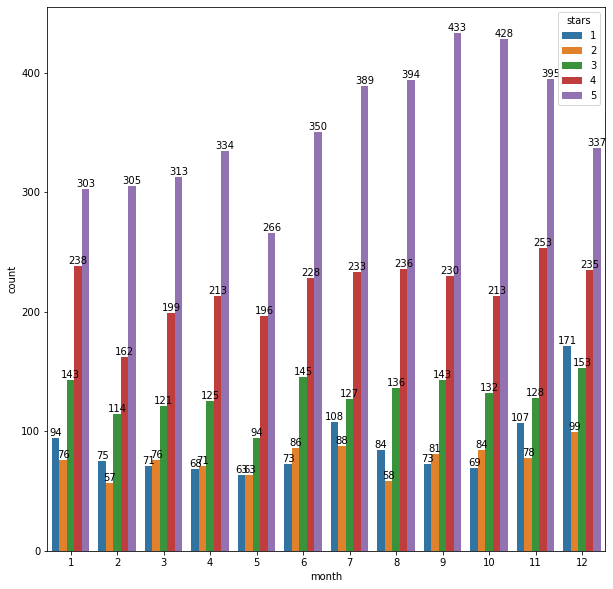

In [28]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data=df,hue="stars",x="month");
for container in ax.containers:
    ax.bar_label(container)

## Text Processing

In [29]:
df['text'] = df.text.str.replace('[^\w\s]','')# Removes punctuation marks

In [30]:
df['text'] = df['text'].str.replace('\d+','')# Removes digits(replaces digits with absence(destroy))

In [31]:
df['text'] = df['text'].str.lower()# All text is converted to lowercase

In [32]:
df['text'] = df['text'].str.replace('\n',' ').replace('\r','')# Line break marks are removed (n means new lines, r means enter was pressed)

In [33]:
df.loc[(df['stars']==1)|(df['stars']==2),'sentiment']='negative'
df.loc[(df['stars']==3),'sentiment']='neutral'
df.loc[(df['stars']==4)|(df['stars']==5),'sentiment']='positive'

- Adding Sentiment Features
 - 1,2 —> Negative
 - 3 —> Neutral
 - 4,5 —> Positive
 
- We assume that if a person scores the restaurant with 4 or 5 points, he/she makes a positive comment, if he/she gives 1 or 2 points, he/she makes a negative comment, and if he/she gives 3 points, he/she makes a neutral comment.

In [34]:
df=df[['stars','sentiment','text']]
df

,stars,sentiment,text
0,5,positive,after getting food poisoning at the palms hote...
1,4,positive,a feast worthy of gods baccarnal buffet in ca...
2,4,positive,the crab legs are better than the ones at wick...
3,1,negative,not worth it too salty food and expensive this...
4,5,positive,i would give this infinite stars if i could my...
...,...,...,...
10412,5,positive,best buffet ever irma was great served us bett...
10413,4,positive,hollllllyyyy moleyyyy this buffet was one fo...
10414,5,positive,the selection is amazing and all the food is e...
10415,4,positive,one of the best buffets ive had in vegas my on...


In [35]:
df['language']=df['text'].apply(detect) #Detecting Language (Removing non English)
df=df[df['language']=='en']

In [36]:
df

,stars,sentiment,text,language
0,5,positive,after getting food poisoning at the palms hote...,en
1,4,positive,a feast worthy of gods baccarnal buffet in ca...,en
2,4,positive,the crab legs are better than the ones at wick...,en
3,1,negative,not worth it too salty food and expensive this...,en
4,5,positive,i would give this infinite stars if i could my...,en
...,...,...,...,...
10412,5,positive,best buffet ever irma was great served us bett...,en
10413,4,positive,hollllllyyyy moleyyyy this buffet was one fo...,en
10414,5,positive,the selection is amazing and all the food is e...,en
10415,4,positive,one of the best buffets ive had in vegas my on...,en


In [37]:
df.sentiment.value_counts() #We saw the total number of positive, negative and neutral comments.

positive    6851
negative    1964
neutral     1557
Name: sentiment, dtype: int64

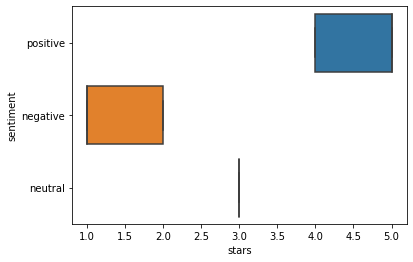

In [38]:
sns.boxplot(y='sentiment',x='stars',data=df);

## Modelling

In [39]:
x=df.text #Split dataset into x (feature) and y (target)
y=df.sentiment 

In [40]:
pd.DataFrame(x.head(5))

,text
0,after getting food poisoning at the palms hote...
1,a feast worthy of gods baccarnal buffet in ca...
2,the crab legs are better than the ones at wick...
3,not worth it too salty food and expensive this...
4,i would give this infinite stars if i could my...


In [41]:
pd.DataFrame(y.head(5))

,sentiment
0,positive
1,positive
2,positive
3,negative
4,positive


In [42]:
# Apply lemmatization and stemming (we remove the suffixes and find the roots)
def split_into_lemmas(text):
    text = str(text).lower()
    words = TextBlob(text).words
    [stemmer.stem(word) for word in words]
    return [word.lemmatize() for word in words]

In [43]:
stemmer = SnowballStemmer('english')

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42) #Split dataset into training and test sets

In [45]:
vec=CountVectorizer(stop_words='english',analyzer=split_into_lemmas)
x_train_vec=vec.fit_transform(x_train)
x_test_vec=vec.transform(x_test)

- opened a column for each word in the sentence
- If this word occurs in this sentence, it writes 1
- learns with fit, transform is used to write 1 and 0
- toarray converts this to string
- Columns takes the column names and puts them at the top
- added 1 if any, 0 if not
- We converted it to array with .toarray(), got the column names with get_feature_names and converted it to dataframe and printed it.

In [46]:
pd.DataFrame(x_train_vec.toarray(),columns=vec.get_feature_names()).sample(10)

,a,aa,aaa,aaaah,aaaawesome,aaahhh,aaamazinnng,aaammmaaazzingggg,aahim,aahs,aalty,aback,abalone,abandoned,abating,abc,abci,abductor,abhorently,abide,abiding,ability,abit,able,aborted,abound,abour,about,aboutthe,above,aboveaverage,abovethen,abroad,abruptly,absent,absinthe,absolute,absolutely,absorbed,absurd,absurdly,abt,abuelita,abundance,abundant,abundantly,abuse,abused,abusive,abut,...,yuzuinfused,yyyuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuummmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm,z,zag,zagged,ze,zealand,zen,zero,zest,zesty,zeus,zhongzi,zi,zig,zigzag,zigzagging,zillion,ziplock,ziti,zone,zonecold,zong,zoo,zooming,zorro,zucchini,étoufféeroasted,ベガスに行くと毎回行きます種類も豊富でつつの料理のクオリティも高いです,一点也不好吃,不用来吃了,価格は少し高めですが満足度が高いです,叉燒包,叉燒肉,很多人排隊要有排隊的準備,服务很好价格也实惠,杭州炒飯,椒鹽魚片,炸春捲,烤鴨,燒麥,皮蛋瘦肉粥,皿,蒙古牛肉,蝦餃,还要至少拍一个小时队,食材不新鲜,食物的選擇蠻多的也不錯不過牡蠣倒是不怎麼樣,饥饿营销明明里面很多空位还告诉我们要排队个半小时到个小时大厅很暗淡黑灯瞎火的食物一般吧就蟹比较新鲜好吃性价比不太高有点失望they,魚香茄子
6788,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3475,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3575,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3807,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1846,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3150,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2852,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5215,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
vec2=CountVectorizer(ngram_range=(1,2),stop_words='english',binary=True,analyzer=split_into_lemmas)
x_train_vec2=vec2.fit_transform(x_train)
x_test_vec2=vec2.transform(x_test)

- Sometimes there are words in the language that do not make sense unless a word comes next to it, or that takes on different meanings with the word that comes next to it (in front of or behind it). In fact, we are doing the same thing with ngram. Look at both the back and front of that word so that we can understand what it is used in.

In [48]:
lr=LogisticRegression()
pred_vec=lr.fit(x_train_vec,y_train).predict(x_test_vec)
#Calculate model evaluation metrics
accuracy=accuracy_score(y_test,pred_vec) 
accuracy

0.7933804627249358

In [49]:
precision=precision_score(y_test,pred_vec,average='weighted')
precision

0.7787694345476086

In [50]:
f1=f1_score(y_test,pred_vec,average='weighted')
f1

0.7844449813664081

In [51]:
recall=recall_score(y_test,pred_vec,average='weighted')
recall

0.7933804627249358

In [52]:
vec1=[accuracy,precision,f1,recall]

In [53]:
confusion_matrix(y_test,pred_vec)

array([[ 413,  104,   66],
       [ 152,  173,  173],
       [  49,   99, 1883]], dtype=int64)

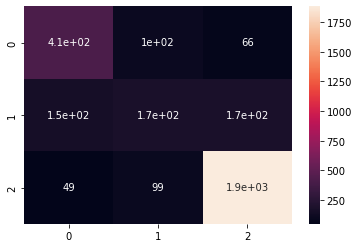

In [54]:
sns.heatmap(confusion_matrix(y_test,pred_vec),annot=True);

In [55]:
pred_vec2=lr.fit(x_train_vec2,y_train).predict(x_test_vec2)
accuracy=accuracy_score(y_test,pred_vec2)
accuracy

0.7904884318766067

In [56]:
precision=precision_score(y_test,pred_vec2,average='weighted')
precision

0.7774835252655667

In [57]:
f1=f1_score(y_test,pred_vec2,average='weighted')
f1

0.7819530638312291

In [58]:
recall=recall_score(y_test,pred_vec2,average='weighted')
recall

0.7904884318766067

In [59]:
vec2=[accuracy,precision,f1,recall]

In [60]:
confusion_matrix(y_test,pred_vec2)

array([[ 421,   89,   73],
       [ 148,  177,  173],
       [  69,  100, 1862]], dtype=int64)

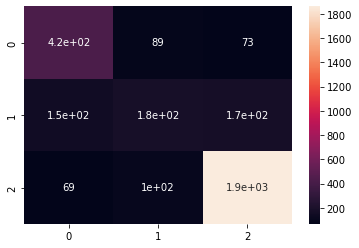

In [61]:
sns.heatmap(confusion_matrix(y_test,pred_vec2),annot=True);

In [62]:
# Now let's see all the measurements in a table
# with zip we were able to collect data in the same table
result=pd.DataFrame(list(zip(vec1,vec2)))
result=result.set_index([['Accuracy','Precision','F1','Recall']])
result.columns=['LogisticR_CountVectorizer','LogisticR_CountVectorizer_Ngram']
result

,LogisticR_CountVectorizer,LogisticR_CountVectorizer_Ngram
Accuracy,0.793380,0.790488
Precision,0.778769,0.777484
F1,0.784445,0.781953
Recall,0.793380,0.790488


## CountVectorizer

- We will find this table for all Classification models, but we have created a function to avoid writing the same codes for each of them one by one.

In [63]:
#Classification models
classifiers=[
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
]

cvec_col=['Classifier','Methods','Accuracy','Precision','Recall','F1']
cvec=pd.DataFrame(columns=cvec_col)

for i in classifiers:
    pred=i.fit(x_train_vec,y_train).predict(x_test_vec)
    #Learning from training data with fit. Model learns by looking at x versus y data
    #Trained model predicts the output with predict command
    name = i.__class__.__name__
    # We will call the models we defined above, respectively, and add their names to the table with this line.
    
    # Calculate model evaluation metrics
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred,average='weighted')
    recall=recall_score(y_test,pred,average='weighted')
    f1=f1_score(y_test,pred,average='weighted')

    cvec_entry=pd.DataFrame([[name,'CountVectorizer',accuracy*100,precision*100,recall*100,f1*100]],columns=cvec_col)
    cvec=cvec.append(cvec_entry)

cvec.sort_values('F1',ascending=False)

,Classifier,Methods,Accuracy,Precision,Recall,F1
0,LogisticRegression,CountVectorizer,79.338046,77.876943,79.338046,78.444498
0,MultinomialNB,CountVectorizer,78.631105,75.849346,78.631105,76.153951
0,AdaBoostClassifier,CountVectorizer,75.449871,71.874333,75.449871,72.689016
0,GradientBoostingClassifier,CountVectorizer,76.156812,72.92826,76.156812,72.216922
0,BernoulliNB,CountVectorizer,69.40874,68.139417,69.40874,67.403426
0,DecisionTreeClassifier,CountVectorizer,64.203085,63.619641,64.203085,63.891358
0,RandomForestClassifier,CountVectorizer,69.955013,77.000581,69.955013,60.859261
0,KNeighborsClassifier,CountVectorizer,64.68509,59.059925,64.68509,60.458647


## N-grams

In [64]:

cvec2_col=['Classifier','Methods','Accuracy','Precision','Recall','F1']
cvec2=pd.DataFrame(columns=cvec2_col)

for i in classifiers:
    pred2=i.fit(x_train_vec2,y_train).predict(x_test_vec2) 
    
    name = i.__class__.__name__

    accuracy=accuracy_score(y_test,pred2)
    precision=precision_score(y_test,pred2,average='weighted')
    recall=recall_score(y_test,pred2,average='weighted')
    f1=f1_score(y_test,pred2,average='weighted')

    cvec2_entry=pd.DataFrame([[name,'N-grams',accuracy*100,precision*100,recall*100,f1*100]],columns=cvec2_col)
    cvec2=cvec2.append(cvec2_entry)

cvec2.sort_values('F1',ascending=False)

,Classifier,Methods,Accuracy,Precision,Recall,F1
0,LogisticRegression,N-grams,79.048843,77.748353,79.048843,78.195306
0,AdaBoostClassifier,N-grams,76.510283,73.3684,76.510283,74.041623
0,MultinomialNB,N-grams,77.474293,73.279451,77.474293,72.745191
0,GradientBoostingClassifier,N-grams,76.060411,72.940744,76.060411,71.955141
0,BernoulliNB,N-grams,69.40874,68.139417,69.40874,67.403426
0,DecisionTreeClassifier,N-grams,65.584833,64.227128,65.584833,64.850498
0,RandomForestClassifier,N-grams,69.858612,72.386785,69.858612,60.656565
0,KNeighborsClassifier,N-grams,66.805913,59.171893,66.805913,59.879901


## TF-IDF

In [65]:
tf1=TfidfVectorizer(stop_words='english')
x_train_tf1=tf1.fit_transform(x_train)
x_test_tf1=tf1.transform(x_test)

tf2=TfidfVectorizer(ngram_range=(1,2),stop_words='english',binary=True)
x_train_tf2=tf2.fit_transform(x_train)
x_test_tf2=tf2.transform(x_test)

In [66]:

tf1_col=['Classifier','Methods','Accuracy','Precision','Recall','F1']
tf1=pd.DataFrame(columns=tf1_col)

for i in classifiers:
    pred_tf1=i.fit(x_train_tf1,y_train).predict(x_test_tf1)
    name = i.__class__.__name__
    
    accuracy=accuracy_score(y_test,pred_tf1)
    precision=precision_score(y_test,pred_tf1,average='weighted')
    recall=recall_score(y_test,pred_tf1,average='weighted')
    f1=f1_score(y_test,pred_tf1,average='weighted')

    tf1_entry=pd.DataFrame([[name,'T-IDF',accuracy*100,precision*100,recall*100,f1*100]],columns=tf1_col)
    tf1=tf1.append(tf1_entry)

tf1.sort_values('F1',ascending=False)

,Classifier,Methods,Accuracy,Precision,Recall,F1
0,LogisticRegression,T-IDF,79.595116,76.946818,79.595116,76.58444
0,AdaBoostClassifier,T-IDF,74.775064,71.337103,74.775064,71.805404
0,GradientBoostingClassifier,T-IDF,74.517995,71.186339,74.517995,70.133015
0,BernoulliNB,T-IDF,70.661954,68.213449,70.661954,67.304679
0,KNeighborsClassifier,T-IDF,69.344473,64.158613,69.344473,65.717125
0,DecisionTreeClassifier,T-IDF,66.580977,64.800735,66.580977,65.576155
0,RandomForestClassifier,T-IDF,71.754499,71.42688,71.754499,63.645833
0,MultinomialNB,T-IDF,65.552699,61.450711,65.552699,52.205827


In [67]:
tf2_col=['Classifier','Methods','Accuracy','Precision','Recall','F1']
tf2=pd.DataFrame(columns=tf2_col)

for i in classifiers:
    pred_tf2=i.fit(x_train_tf2,y_train).predict(x_test_tf2)
    name = i.__class__.__name__
    #Yukarıda tanımladığımız modelleri sırasıyla çağıracağız ve isminide tabloya bu kod ile ekliyoruz.
    
    accuracy=accuracy_score(y_test,pred_tf2)
    precision=precision_score(y_test,pred_tf2,average='weighted')
    recall=recall_score(y_test,pred_tf2,average='weighted')
    f1=f1_score(y_test,pred_tf2,average='weighted')

    tf2_entry=pd.DataFrame([[name,'T-IDF/N-gram',accuracy*100,precision*100,recall*100,f1*100]],columns=tf2_col)
    tf2=tf2.append(tf2_entry)

tf2.sort_values('F1',ascending=False)

,Classifier,Methods,Accuracy,Precision,Recall,F1
0,LogisticRegression,T-IDF/N-gram,77.120823,73.613586,77.120823,71.867147
0,GradientBoostingClassifier,T-IDF/N-gram,75.064267,71.895745,75.064267,71.019339
0,AdaBoostClassifier,T-IDF/N-gram,73.875321,70.028822,73.875321,70.72189
0,KNeighborsClassifier,T-IDF/N-gram,71.722365,66.720229,71.722365,67.057291
0,DecisionTreeClassifier,T-IDF/N-gram,64.620823,63.766233,64.620823,64.170334
0,RandomForestClassifier,T-IDF/N-gram,70.01928,73.019323,70.01928,60.855905
0,BernoulliNB,T-IDF/N-gram,65.456298,61.324342,65.456298,52.15284
0,MultinomialNB,T-IDF/N-gram,65.263496,42.593239,65.263496,51.545853


In [68]:
#To show all results in one table
result=pd.concat([cvec,cvec2,tf1,tf2],axis=0)
result

,Classifier,Methods,Accuracy,Precision,Recall,F1
0,LogisticRegression,CountVectorizer,79.338046,77.876943,79.338046,78.444498
0,KNeighborsClassifier,CountVectorizer,64.68509,59.059925,64.68509,60.458647
0,DecisionTreeClassifier,CountVectorizer,64.203085,63.619641,64.203085,63.891358
0,RandomForestClassifier,CountVectorizer,69.955013,77.000581,69.955013,60.859261
0,AdaBoostClassifier,CountVectorizer,75.449871,71.874333,75.449871,72.689016
0,GradientBoostingClassifier,CountVectorizer,76.156812,72.92826,76.156812,72.216922
0,MultinomialNB,CountVectorizer,78.631105,75.849346,78.631105,76.153951
0,BernoulliNB,CountVectorizer,69.40874,68.139417,69.40874,67.403426
0,LogisticRegression,N-grams,79.048843,77.748353,79.048843,78.195306
0,KNeighborsClassifier,N-grams,66.805913,59.171893,66.805913,59.879901


## Sentiment Analysis - Text Processing

- Textblob returns two properties: polarity and subjectivity.
- Polarity: It takes a value between [-1,1] and 1 represents a positive sentence and -1 represents a negative sentence.
- Subjectivity: It usually expresses a personal opinion and takes a value between [0,1].

In [69]:
df[['polarity','subjectivity']]=df['text'].apply(lambda t:pd.Series(TextBlob(t).sentiment))

- To find the ratios of negativity, positivity, and neutrality

In [70]:
df[['neg','neu','pos','compound']]=df['text'].apply(lambda t:pd.Series(SentimentIntensityAnalyzer().polarity_scores(t)))

In [71]:
df

,stars,sentiment,text,language,polarity,subjectivity,neg,neu,pos,compound
0,5,positive,after getting food poisoning at the palms hote...,en,0.367452,0.605702,0.092,0.657,0.251,0.9902
1,4,positive,a feast worthy of gods baccarnal buffet in ca...,en,0.219409,0.537292,0.090,0.755,0.155,0.9973
2,4,positive,the crab legs are better than the ones at wick...,en,-0.134722,0.731944,0.130,0.773,0.098,-0.6628
3,1,negative,not worth it too salty food and expensive this...,en,-0.325000,0.400000,0.089,0.911,0.000,-0.1695
4,5,positive,i would give this infinite stars if i could my...,en,0.362500,0.725000,0.031,0.739,0.230,0.9325
...,...,...,...,...,...,...,...,...,...,...
10412,5,positive,best buffet ever irma was great served us bett...,en,0.543750,0.481250,0.000,0.537,0.463,0.9042
10413,4,positive,hollllllyyyy moleyyyy this buffet was one fo...,en,0.210101,0.586869,0.000,0.749,0.251,0.9524
10414,5,positive,the selection is amazing and all the food is e...,en,0.480000,0.630000,0.000,0.504,0.496,0.9565
10415,4,positive,one of the best buffets ive had in vegas my on...,en,0.185185,0.533333,0.077,0.748,0.175,0.5719


In [72]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=25000,
                  stopwords=stopwords)
    wc.generate(str(text))
    wc.to_file("cloud2.png")
    print("Word Cloud Saved Successfully")
    path="cloud2.png"
    display(Image.open(path))

## <font color=blue> Negative (1 and 2-star reviews)

Word Cloud Saved Successfully


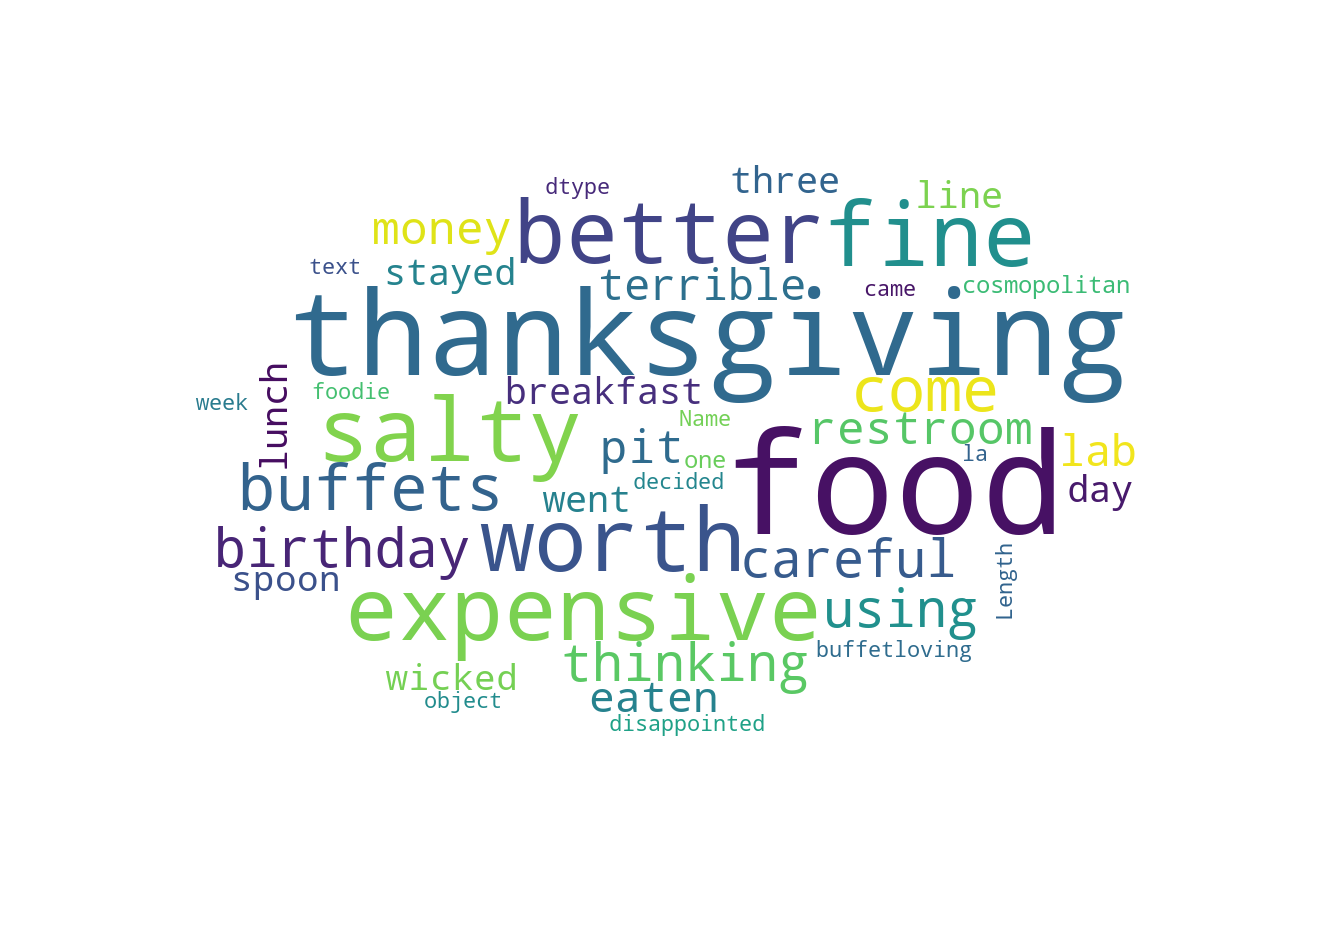

In [73]:
text1=df[(df["stars"]==1)|(df["stars"]==2)]
create_wordcloud(text1.text)

## <font color=blue> Neutral (3-star reviews)

Word Cloud Saved Successfully


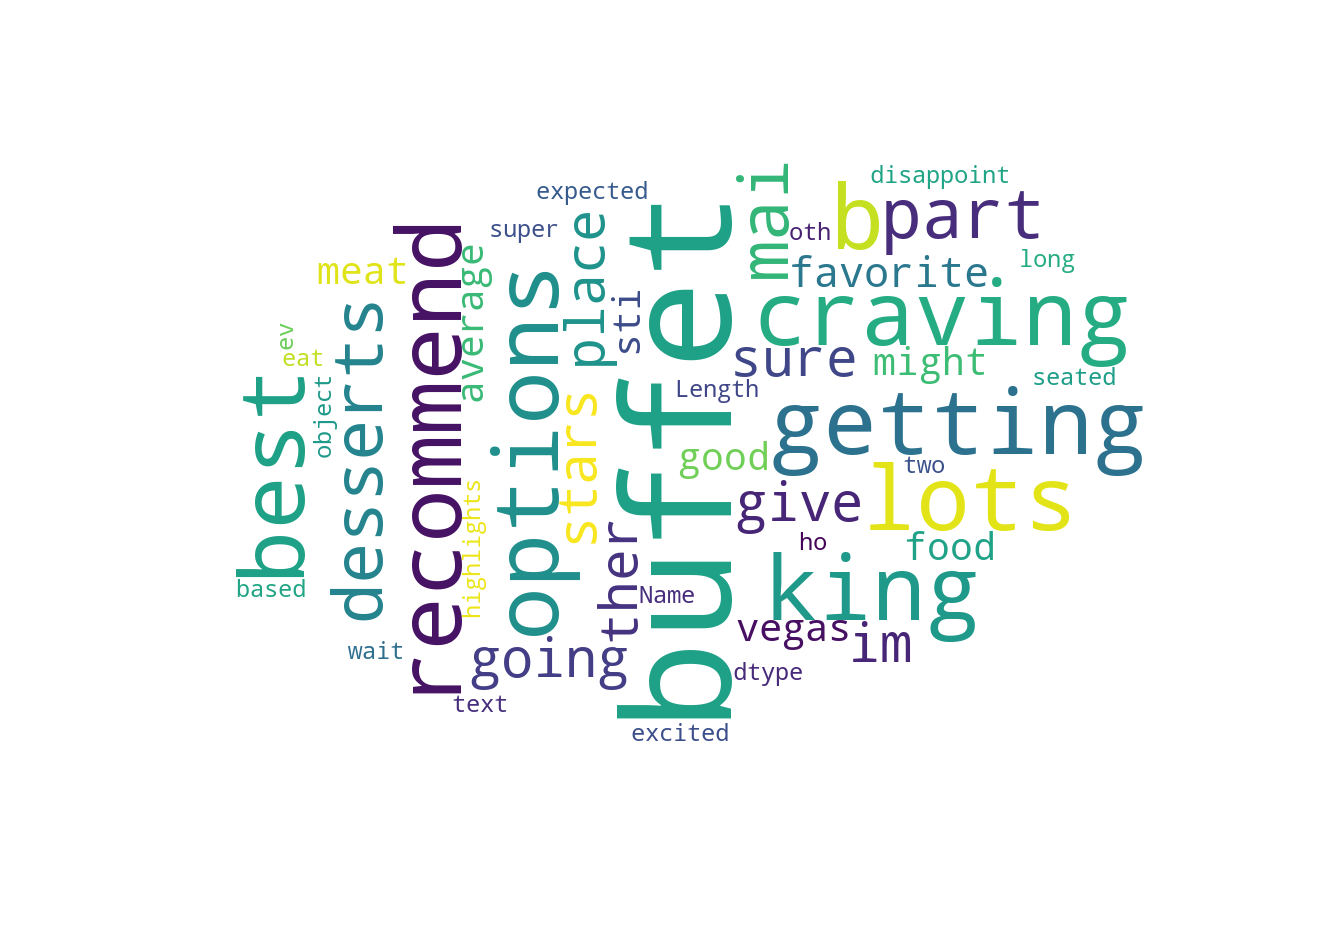

In [74]:
text2=df[df["stars"]==3]
create_wordcloud(text2.text)

## <font color=blue> Positive (4 and 5-star reviews)

Word Cloud Saved Successfully


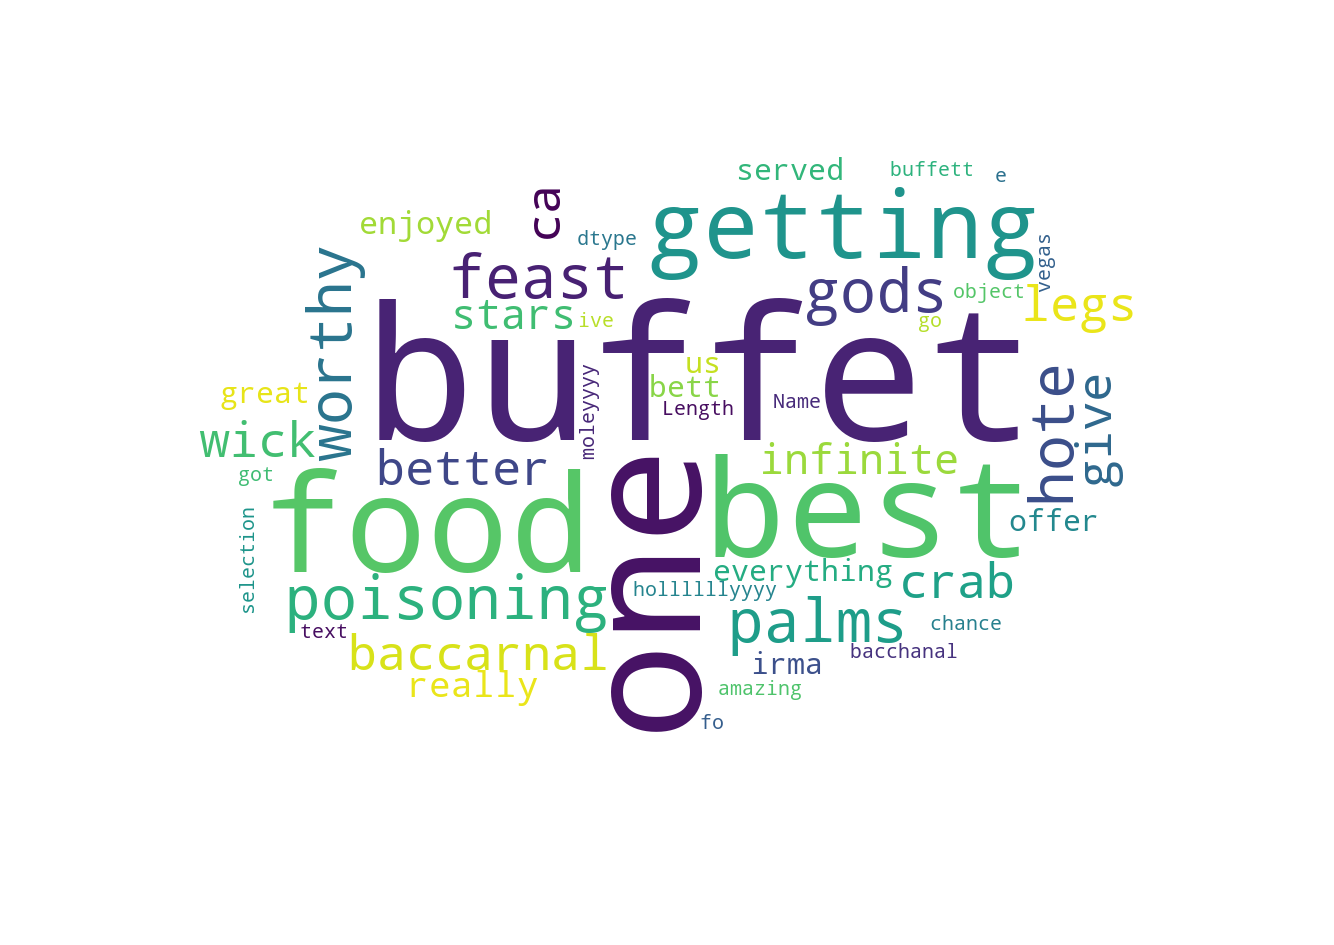

In [75]:
text3=df[(df["stars"]==4)|(df["stars"]==5)]
create_wordcloud(text3.text)